<a href="https://colab.research.google.com/github/PeterTowers/skinLesion/blob/main/efficientNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SkinLesion - Desafio ISIC 2019 - EfficientNets
Pré-treinadas com o ImageNet.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall, AUC

### Download dos arquivos do Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Copy data from Google Drive to Colab's machine
!cp -v '/content/drive/MyDrive/Colab Notebooks/skinLesionClass/data.zip' .

# Unzip files
!unzip "/content/data.zip" -d "."

# Delete zip file
!rm data.zip

Streaming output truncated to the last 5000 lines.
  inflating: ./data/ISIC_0069198_aug.jpg  
  inflating: ./data/ISIC_0069198.jpg  
  inflating: ./data/ISIC_0069201_aug2.jpg  
  inflating: ./data/ISIC_0069201_aug.jpg  
  inflating: ./data/ISIC_0069201.jpg  
  inflating: ./data/ISIC_0069202.jpg  
  inflating: ./data/ISIC_0069203_aug2.jpg  
  inflating: ./data/ISIC_0069203_aug.jpg  
  inflating: ./data/ISIC_0069203.jpg  
  inflating: ./data/ISIC_0069204.jpg  
  inflating: ./data/ISIC_0069205.jpg  
  inflating: ./data/ISIC_0069206.jpg  
  inflating: ./data/ISIC_0069207.jpg  
  inflating: ./data/ISIC_0069209.jpg  
  inflating: ./data/ISIC_0069210_aug2.jpg  
  inflating: ./data/ISIC_0069210_aug.jpg  
  inflating: ./data/ISIC_0069210.jpg  
  inflating: ./data/ISIC_0069211_aug2.jpg  
  inflating: ./data/ISIC_0069211_aug.jpg  
  inflating: ./data/ISIC_0069211.jpg  
  inflating: ./data/ISIC_0069212.jpg  
  inflating: ./data/ISIC_0069213.jpg  
  inflating: ./data/ISIC_0069215.jpg  
  inflating:

Abertura dos dataframes

In [ ]:
# Open dataframes containing the images for training, validation and test
train_df = pd.read_csv(
    r"/content/drive/MyDrive/Colab Notebooks/skinLesionClass/dataframes/isic2019_train.csv")

aug_df = pd.read_csv(
    r"/content/drive/MyDrive/Colab Notebooks/skinLesionClass/dataframes/isic2019_train_aug1.csv")

val_df = pd.read_csv(
    r"/content/drive/MyDrive/Colab Notebooks/skinLesionClass/dataframes/isic2019_val.csv")

test_df = pd.read_csv(
    r"/content/drive/MyDrive/Colab Notebooks/skinLesionClass/dataframes/isic2019_test.csv")

### Pegar e salvar imagens das lesões

In [ ]:
# mel = train_df.loc[train_df['lesion'] == "MEL"]
# nv  = train_df.loc[train_df['lesion'] == "NV"]
# bcc = train_df.loc[train_df['lesion'] == "BCC"]
# ak  = train_df.loc[train_df['lesion'] == "AK"]
# bkl = train_df.loc[train_df['lesion'] == "BKL"]
# df  = train_df.loc[train_df['lesion'] == "DF"]
# vasc = train_df.loc[train_df['lesion'] == "VASC"]
# scc = train_df.loc[train_df['lesion'] == "SCC"]

In [ ]:
# mel_path = mel['image_path'].sample().values[0]
# nv_path = nv['image_path'].sample().values[0]
# bcc_path = bcc['image_path'].sample().values[0]
# ak_path = ak['image_path'].sample().values[0]
# bkl_path = bkl['image_path'].sample().values[0]
# df_path = df['image_path'].sample().values[0]
# vasc_path = vasc['image_path'].sample().values[0]
# scc_path = scc['image_path'].sample().values[0]

In [ ]:
# from matplotlib import pyplot as plt

# mel_img = plt.imread(mel_path)
# nv_img = plt.imread(nv_path)
# bcc_img = plt.imread(bcc_path)
# ak_img = plt.imread(ak_path)
# bkl_img = plt.imread(bkl_path)
# df_img = plt.imread(df_path)
# vasc_img = plt.imread(vasc_path)
# scc_img = plt.imread(scc_path)

In [ ]:
# plt.imsave("nv_img.jpg", nv_img)
# plt.imsave("bcc_img.jpg", bcc_img)
# plt.imsave("ak_img.jpg", ak_img)
# plt.imsave("bkl_img.jpg", bkl_img)
# plt.imsave("df_img.jpg", df_img)
# plt.imsave("vasc_img.jpg", vasc_img)
# plt.imsave("scc_img.jpg", scc_img)

## Informações sobre os *datasets* de treino, validação e teste

In [ ]:
# Train dataframe WITHOUT data augmentation
print(train_df.info(), end='\n\n')
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17731 entries, 0 to 17730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       17731 non-null  object 
 1   MEL         17731 non-null  float64
 2   NV          17731 non-null  float64
 3   BCC         17731 non-null  float64
 4   AK          17731 non-null  float64
 5   BKL         17731 non-null  float64
 6   DF          17731 non-null  float64
 7   VASC        17731 non-null  float64
 8   SCC         17731 non-null  float64
 9   UNK         17731 non-null  float64
 10  image_path  17731 non-null  object 
 11  lesion      17731 non-null  object 
dtypes: float64(9), object(3)
memory usage: 1.6+ MB
None



,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_path,lesion
0,ISIC_0062259,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0062259.jpg,NV
1,ISIC_0006021_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0006021_downsampled.jpg,NV
2,ISIC_0073039,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,./data/ISIC_0073039.jpg,BKL
3,ISIC_0071603,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0071603.jpg,BCC
4,ISIC_0033780,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,./data/ISIC_0033780.jpg,DF


In [ ]:
# Augmented train dataframe
print(aug_df.info(), end='\n\n')
aug_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26450 entries, 0 to 26449
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       26450 non-null  object 
 1   MEL         26450 non-null  float64
 2   NV          26450 non-null  float64
 3   BCC         26450 non-null  float64
 4   AK          26450 non-null  float64
 5   BKL         26450 non-null  float64
 6   DF          26450 non-null  float64
 7   VASC        26450 non-null  float64
 8   SCC         26450 non-null  float64
 9   UNK         26450 non-null  float64
 10  image_path  26450 non-null  object 
 11  lesion      26450 non-null  object 
dtypes: float64(9), object(3)
memory usage: 2.4+ MB
None



,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_path,lesion
0,ISIC_0073039,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,./data/ISIC_0073039.jpg,BKL
1,ISIC_0071603,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0071603.jpg,BCC
2,ISIC_0033780,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,./data/ISIC_0033780.jpg,DF
3,ISIC_0065892,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,./data/ISIC_0065892.jpg,BKL
4,ISIC_0068260,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0068260.jpg,BCC


In [ ]:
# Validation dataframe
print(val_df.info(), end='\n\n')
val_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5066 entries, 0 to 5065
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5066 non-null   object 
 1   MEL         5066 non-null   float64
 2   NV          5066 non-null   float64
 3   BCC         5066 non-null   float64
 4   AK          5066 non-null   float64
 5   BKL         5066 non-null   float64
 6   DF          5066 non-null   float64
 7   VASC        5066 non-null   float64
 8   SCC         5066 non-null   float64
 9   UNK         5066 non-null   float64
 10  image_path  5066 non-null   object 
 11  lesion      5066 non-null   object 
dtypes: float64(9), object(3)
memory usage: 475.1+ KB
None



,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_path,lesion
0,ISIC_0029598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,./data/ISIC_0029598.jpg,SCC
1,ISIC_0054298,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0054298.jpg,NV
2,ISIC_0031407,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0031407.jpg,BCC
3,ISIC_0055665,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0055665.jpg,MEL
4,ISIC_0025318,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0025318.jpg,NV


In [ ]:
# Test dataframe
print(test_df.info(), end='\n\n')
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       2534 non-null   object 
 1   MEL         2534 non-null   float64
 2   NV          2534 non-null   float64
 3   BCC         2534 non-null   float64
 4   AK          2534 non-null   float64
 5   BKL         2534 non-null   float64
 6   DF          2534 non-null   float64
 7   VASC        2534 non-null   float64
 8   SCC         2534 non-null   float64
 9   UNK         2534 non-null   float64
 10  image_path  2534 non-null   object 
 11  lesion      2534 non-null   object 
dtypes: float64(9), object(3)
memory usage: 237.7+ KB
None



,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,image_path,lesion
0,ISIC_0013383_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0013383_downsampled.jpg,NV
1,ISIC_0070201,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0070201.jpg,BCC
2,ISIC_0027725,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0027725.jpg,NV
3,ISIC_0000167,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0000167.jpg,MEL
4,ISIC_0014692_downsampled,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,./data/ISIC_0014692_downsampled.jpg,NV


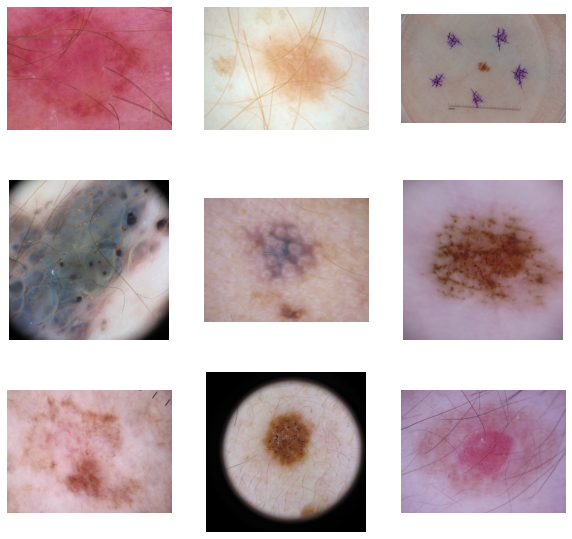

In [ ]:
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 10))

for i in range(9):
    image = plt.imread(str(val_df['colab_path'].sample(random_state=i).values[0]))

    fig.add_subplot(3, 3, i+1)

    plt.imshow(image)
    plt.axis('off')

## Instanciação da rede

### Dependências
#### Métricas

In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

micro_f1 = tfa.metrics.F1Score(
    num_classes=8,
    average='micro',
    name="Micro F1",
)

macro_f1 = tfa.metrics.F1Score(
    num_classes=8,
    average='macro',
    name="Macro F1",
)

     |████████████████████████████████| 1.1 MB 9.0 MB/s 


## Treinamento

### EfficientNet-B0 testbench

#### Geradores dos tensores (B0)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224

train_dataGen = ImageDataGenerator(rescale=1./255)

train_generator = train_dataGen.flow_from_dataframe(
    dataframe=aug_df, x_col='colab_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

val_generator = train_dataGen.flow_from_dataframe(
    dataframe=val_df, x_col='colab_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

test_generator = train_dataGen.flow_from_dataframe(
    dataframe=test_df, x_col='colab_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

Found 26450 validated image filenames.
Found 5066 validated image filenames.
Found 2534 validated image filenames.


#### Instanciação da rede

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers

# Load EfficientNet pre-trained w/ ImageNet
base_model = EfficientNetB0(include_top=False, weights="imagenet")

# Rebuild top
avg = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
norm = layers.BatchNormalization()(avg)
dropout = layers.Dropout(0.5, name="top_dropout")(norm)
output = layers.Dense(8, activation="softmax", name="pred")(dropout)

model = tf.keras.Model(base_model.input, output, name="EfficientNet-B0")

# Freeze the pretrained weights
for layer in base_model.layers:
    layer.trainable = False

# Optimizer setup
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

# Metrics
metrics = [CategoricalAccuracy(name='Categorical Accuracy'),
           micro_f1, macro_f1]

# Compile model
model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=metrics)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# Compute class' weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(train_df.lesion),
                                     train_df.lesion)
class_weights = dict(enumerate(class_weights))

print(class_weights)

{0: 3.651359143327842, 1: 0.9528697334479793, 2: 1.206518780620577, 3: 13.271706586826348, 4: 0.7002764612954187, 5: 0.2459359742565468, 6: 5.037215909090909, 7: 12.521892655367232}


#### Treinamento das camadas superiores

In [ ]:
# Top layers training
# Train with callback (early stopping)
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=20, restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "./effNet-B0_{epoch:02d}",
    monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='min')

# Epochs - min:8; max:80
history = model.fit(train_generator, validation_data=val_generator, epochs=50,
                    class_weight=class_weights,
                    callbacks=[checkpoint])

Epoch 1/50
827/827 [==============================] - 480s 556ms/step - loss: 7.4262 - Categorical Accuracy: 0.1523 - Micro F1: 0.1523 - Macro F1: 0.0814 - val_loss: 1.9955 - val_Categorical Accuracy: 0.1784 - val_Micro F1: 0.1784 - val_Macro F1: 0.0379

Epoch 00001: val_loss improved from inf to 1.99552, saving model to ./effNet-B0_01
Epoch 2/50
827/827 [==============================] - 456s 552ms/step - loss: 5.0881 - Categorical Accuracy: 0.1620 - Micro F1: 0.1620 - Macro F1: 0.0671 - val_loss: 2.0358 - val_Categorical Accuracy: 0.1784 - val_Micro F1: 0.1784 - val_Macro F1: 0.0379

Epoch 00002: val_loss did not improve from 1.99552
Epoch 3/50
827/827 [==============================] - 452s 547ms/step - loss: 4.6102 - Categorical Accuracy: 0.1792 - Micro F1: 0.1792 - Macro F1: 0.0630 - val_loss: 2.2000 - val_Categorical Accuracy: 0.1784 - val_Micro F1: 0.1784 - val_Macro F1: 0.0379

Epoch 00003: val_loss did not improve from 1.99552
Epoch 4/50
827/827 [==============================

KeyboardInterrupt: ignored

In [ ]:
model.save("./effNetB0")

In [ ]:
print(history)

NameError: ignored

### Carregamento da arquitetura B3

#### Geradores dos tensores (B3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 300

train_dataGen = ImageDataGenerator(rescale=1./255)

train_generator = train_dataGen.flow_from_dataframe(
    dataframe=aug_df, x_col='colab_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

val_generator = train_dataGen.flow_from_dataframe(
    dataframe=val_df, x_col='colab_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

test_generator = train_dataGen.flow_from_dataframe(
    dataframe=test_df, x_col='colab_path', class_mode='raw', seed=31415,
    y_col=['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC'],
    target_size=(IMG_SIZE, IMG_SIZE), batch_size=32)

Found 26450 validated image filenames.
Found 5066 validated image filenames.
Found 2534 validated image filenames.


#### Instanciação da arquitetura

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers

# Load EfficientNet pre-trained w/ ImageNet
base_model = EfficientNetB3(include_top=False, weights="imagenet")

# Rebuild top
avg = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
norm = layers.BatchNormalization()(avg)
dropout = layers.Dropout(0.5, name="top_dropout")(norm)
output = layers.Dense(8, activation="softmax", name="pred")(dropout)

model = tf.keras.Model(base_model.input, output, name="EfficientNetB3")

# Freeze the pretrained weights
for layer in base_model.layers:
    layer.trainable = False

# Optimizer setup
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

# Metrics
metrics = [CategoricalAccuracy(name='Categorical Accuracy'),
           micro_f1, macro_f1]

# Compile model
model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["accuracy", AUC(name="AUC"), Recall(name="Recall"), specificity, Precision(name="Precision"),
                       f1_score])

43950080/43941136 [==============================] - 2s 0us/step


### Cálculo dos pesos das classes

In [ ]:
# Compute class' weights
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(train_df.lesion),
                                     train_df.lesion)
class_weights = dict(enumerate(class_weights))

print(class_weights)

{0: 3.651359143327842, 1: 0.9528697334479793, 2: 1.206518780620577, 3: 13.271706586826348, 4: 0.7002764612954187, 5: 0.2459359742565468, 6: 5.037215909090909, 7: 12.521892655367232}


### Treinamento das camadas superiores

In [ ]:
# Load previous best weights
model.load_weights(
    '/content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_33')

In [ ]:
# Top layers training
# Train with callback (early stopping)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=20, restore_best_weights=True)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_{epoch:02d}",
    monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='min')

# Epochs - min:8; max:80
history = model.fit(train_generator, validation_data=val_generator, epochs=50, class_weight=class_weights,
                    callbacks=[early_stop, checkpoint])

Epoch 1/50
827/827 [==============================] - ETA: 0s - loss: 6.4559 - accuracy: 0.1581 - AUC: 0.6131 - Recall: 0.0698 - specificity: 0.9451 - Precision: 0.1537 - F1-Score: 0.0969

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py:257: UserWarning: Metric F1_Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  'consistency.' % (self.__class__.__name__,))


827/827 [==============================] - 538s 640ms/step - loss: 6.4559 - accuracy: 0.1581 - AUC: 0.6131 - Recall: 0.0698 - specificity: 0.9451 - Precision: 0.1537 - F1-Score: 0.0969 - val_loss: 2.2778 - val_accuracy: 0.0345 - val_AUC: 0.6692 - val_Recall: 0.0000e+00 - val_specificity: 1.0000 - val_Precision: 0.0000e+00 - val_F1-Score: 0.0000e+00

Epoch 00001: val_loss improved from inf to 2.27779, saving model to /content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_01
Epoch 2/50
827/827 [==============================] - 525s 635ms/step - loss: 4.6156 - accuracy: 0.1845 - AUC: 0.6219 - Recall: 0.0117 - specificity: 0.9917 - Precision: 0.1675 - F1-Score: 0.0218 - val_loss: 2.0873 - val_accuracy: 0.1784 - val_AUC: 0.6004 - val_Recall: 0.0000e+00 - val_specificity: 1.0000 - val_Precision: 0.0000e+00 - val_F1-Score: 0.0000e+00

Epoch 00002: val_loss improved from 2.27779 to 2.08725, saving model to /content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_

### Treinamento de todas as camadas

In [ ]:
# model.load_weights(
#     '/content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_full_08')

# Unfreeze all layer's pretrained weights
for layer in model.layers:
    layer.trainable = True

# Reduce learning rate to to 10^(-4)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["accuracy", AUC(name="AUC"), Recall(name="Recall"),
                       specificity, Precision(name="Precision"), f1_score])

In [ ]:
# Train with callback (early stopping)
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_F1-Score', patience=20, restore_best_weights=True)

# Save model's best weights based on validation loss
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_full_{epoch:02d}",
    monitor='val_F1-Score', verbose=1, save_best_only=True,
    save_weights_only=True, mode='max')

# Epochs - min:8; max:80
history2 = model.fit(train_generator, validation_data=val_generator, epochs=20,
                    class_weight=class_weights,
                    callbacks=[early_stop, checkpoint])

Epoch 1/20
827/827 [==============================] - 755s 895ms/step - loss: 0.1165 - accuracy: 0.9726 - AUC: 0.9988 - Recall: 0.9704 - specificity: 0.9965 - Precision: 0.9750 - F1-Score: 0.9727 - val_loss: 2.8961 - val_accuracy: 0.4433 - val_AUC: 0.7951 - val_Recall: 0.4159 - val_specificity: 0.9314 - val_Precision: 0.4645 - val_F1-Score: 0.4389

Epoch 00001: val_F1-Score improved from -inf to 0.43887, saving model to /content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_full_01
Epoch 2/20
827/827 [==============================] - 694s 839ms/step - loss: 0.1040 - accuracy: 0.9742 - AUC: 0.9988 - Recall: 0.9726 - specificity: 0.9967 - Precision: 0.9765 - F1-Score: 0.9746 - val_loss: 2.7145 - val_accuracy: 0.5298 - val_AUC: 0.8041 - val_Recall: 0.5113 - val_specificity: 0.9384 - val_Precision: 0.5422 - val_F1-Score: 0.5263

Epoch 00002: val_F1-Score improved from 0.43887 to 0.52626, saving model to /content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3

In [ ]:
#Save history as CSV
pd.DataFrame.from_dict(history2.history)\
    .to_csv("/content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_history.csv",
        index=False)

## Teste

In [ ]:
# Predicts labels
test_predictions = model.predict(test_generator, verbose=1)

80/80 [==============================] - 46s 569ms/step


#### Salvar/Carregar modelo ou pesos

In [ ]:
# Save model's current weights (CAUTION: defaults to overwrite)
# model.save_weights('./models/efficientNetB3_topTrained')

# Load model (the whole model, including architecture and weights)
# model = tf.keras.models.load_model('./models/efficientNetB2_topTrained.tf')

# Load model weights
# model.load_weights('./models/efficientNetB3_topTrained')

In [ ]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras import layers

# Load EfficientNet pre-trained w/ ImageNet
base_model = EfficientNetB3(include_top=False, weights="imagenet")

# Rebuild top
avg = layers.GlobalAveragePooling2D(name="avg_pool")(base_model.output)
norm = layers.BatchNormalization()(avg)
dropout = layers.Dropout(0.5, name="top_dropout")(norm)
output = layers.Dense(8, activation="softmax", name="pred")(dropout)

model2 = tf.keras.Model(base_model.input, output, name="EfficientNetB3")

# Load model's weights
model2.load_weights(
    '/content/drive/MyDrive/Colab Notebooks/skinLesionClass/models/effNetB3_full_11')

# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

model.compile(optimizer=optimizer, loss="categorical_crossentropy",
              metrics=["accuracy", AUC(name="AUC"), Recall(name="Recall"), specificity, Precision(name="Precision"),
                       f1_score])

## Resultados

### Resultados EfficientNet B3
*   Batch size: 32;
*   Pré-treinada com a ImageNet;
*   Topo treinado por 33 épocas.

#### 4º teste

Demais camadas treinadas por mais 15+8+11 épocas. Dropout = 0.5!

In [ ]:
# Predicts labels
test_predictions = model2.predict(test_generator, verbose=1)

80/80 [==============================] - 40s 471ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1),
                            test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.17      0.18      0.17       453
           1       0.52      0.64      0.57      1288
           2       0.15      0.10      0.12       332
           3       0.04      0.05      0.05        87
           4       0.09      0.03      0.04       262
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        63

    accuracy                           0.37      2534
   macro avg       0.12      0.12      0.12      2534
weighted avg       0.32      0.37      0.34      2534



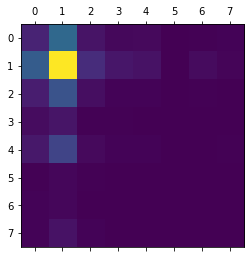

In [ ]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = tf.math.confusion_matrix(test_generator.labels.argmax(1),
                                     test_predictions.argmax(1))

plt.matshow(confusion)

Demais camadas treinadas por mais 15+8+20 épocas. Dropout = 0.5!

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1),
                            test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.17      0.23      0.19       453
           1       0.50      0.64      0.56      1288
           2       0.16      0.02      0.03       332
           3       0.10      0.05      0.06        87
           4       0.12      0.08      0.09       262
           5       0.00      0.00      0.00        24
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        63

    accuracy                           0.38      2534
   macro avg       0.13      0.13      0.12      2534
weighted avg       0.32      0.38      0.34      2534



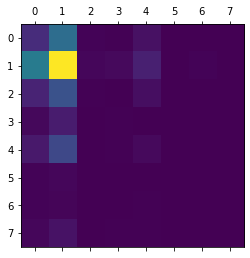

In [ ]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = tf.math.confusion_matrix(test_generator.labels.argmax(1),
                                     test_predictions.argmax(1))

plt.matshow(confusion)

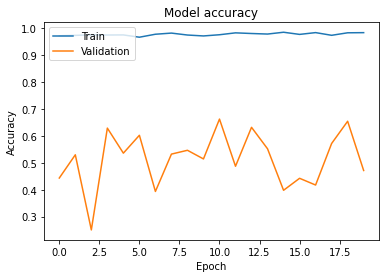

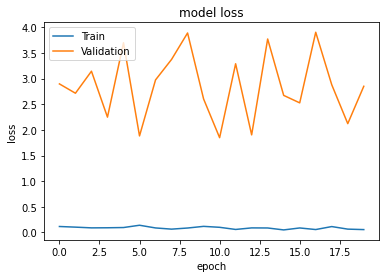

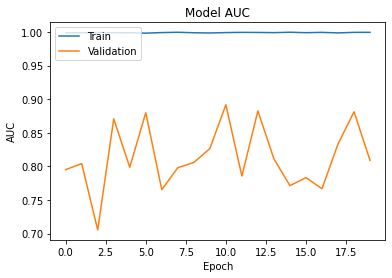

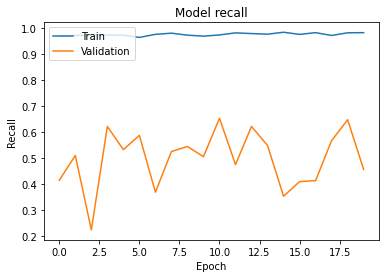

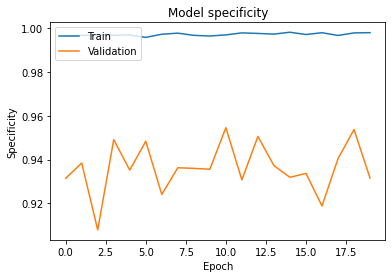

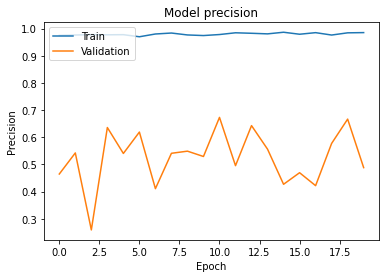

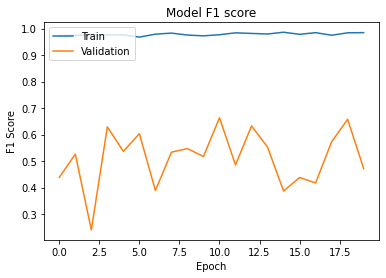

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history2 for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history2 for auc
plt.plot(history2.history['AUC'])
plt.plot(history2.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history2 for recall
plt.plot(history2.history['Recall'])
plt.plot(history2.history['val_Recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history2 for specificity
plt.plot(history2.history['specificity'])
plt.plot(history2.history['val_specificity'])
plt.title('Model specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history2 for precision
plt.plot(history2.history['Precision'])
plt.plot(history2.history['val_Precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history2 for f1_score
plt.plot(history2.history['F1-Score'])
plt.plot(history2.history['val_F1-Score'])
plt.title('Model F1 score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 3º Teste

Demais camadas treinadas por mais 15+8 épocas. **Dropout = 0.5!**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1),
                            test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.18      0.14      0.16       453
           1       0.52      0.62      0.57      1288
           2       0.13      0.13      0.13       332
           3       0.04      0.05      0.04        87
           4       0.13      0.06      0.08       262
           5       0.00      0.00      0.00        24
           6       0.07      0.04      0.05        25
           7       0.00      0.00      0.00        63

    accuracy                           0.37      2534
   macro avg       0.13      0.13      0.13      2534
weighted avg       0.33      0.37      0.34      2534



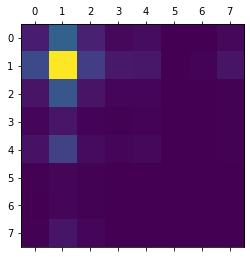

In [ ]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = tf.math.confusion_matrix(test_generator.labels.argmax(1),
                                     test_predictions.argmax(1))

plt.matshow(confusion)

#### 2º Teste

Demais camadas treinadas por mais 15 épocas. **Dropout = 0.5!**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1),
                            test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.18      0.23      0.20       453
           1       0.52      0.52      0.52      1288
           2       0.10      0.08      0.09       332
           3       0.04      0.08      0.06        87
           4       0.10      0.08      0.09       262
           5       0.00      0.00      0.00        24
           6       0.05      0.08      0.06        25
           7       0.00      0.00      0.00        63

    accuracy                           0.33      2534
   macro avg       0.13      0.13      0.13      2534
weighted avg       0.32      0.33      0.32      2534



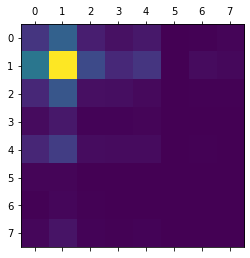

In [ ]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = tf.math.confusion_matrix(test_generator.labels.argmax(1),
                                     test_predictions.argmax(1))

plt.matshow(confusion)

Demais camadas treinadas por mais 14 épocas. **Dropout = 0.5!**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1),
                            test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.15      0.07      0.09       453
           1       0.51      0.57      0.54      1288
           2       0.13      0.13      0.13       332
           3       0.01      0.02      0.02        87
           4       0.11      0.10      0.10       262
           5       0.00      0.00      0.00        24
           6       0.02      0.04      0.03        25
           7       0.02      0.02      0.02        63

    accuracy                           0.33      2534
   macro avg       0.12      0.12      0.12      2534
weighted avg       0.32      0.33      0.32      2534



#### 1º teste

Demais camadas por outras 22 épocas. **Dropout = 0.2!**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_generator.labels.argmax(1),
                            test_predictions.argmax(1), zero_division=0))

              precision    recall  f1-score   support

           0       0.20      0.51      0.29       453
           1       0.52      0.53      0.52      1288
           2       0.00      0.00      0.00       332
           3       0.00      0.00      0.00        87
           4       1.00      0.01      0.02       262
           5       0.00      0.00      0.00        24
           6       0.02      0.04      0.03        25
           7       0.00      0.00      0.00        63

    accuracy                           0.36      2534
   macro avg       0.22      0.14      0.11      2534
weighted avg       0.40      0.36      0.32      2534



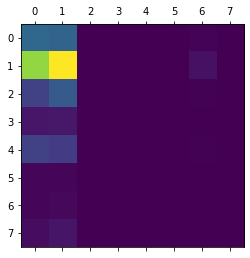

In [ ]:
import matplotlib.pyplot as plt

# Confusion matrix
confusion = tf.math.confusion_matrix(test_generator.labels.argmax(1), test_predictions.argmax(1))

plt.matshow(confusion)

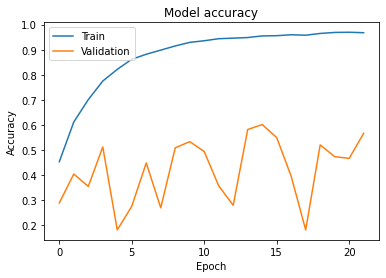

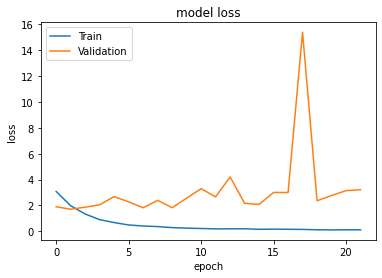

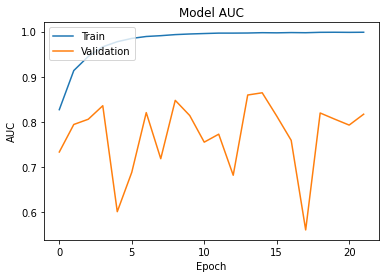

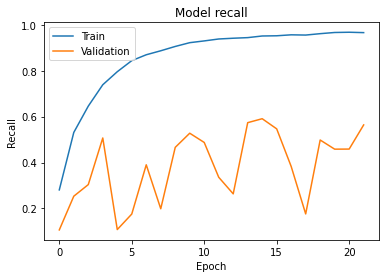

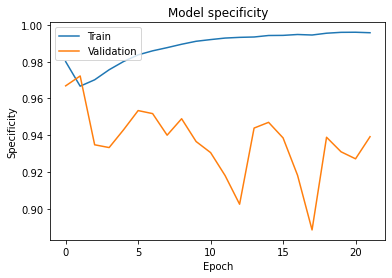

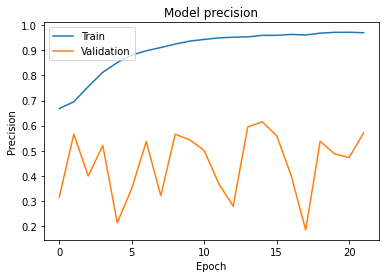

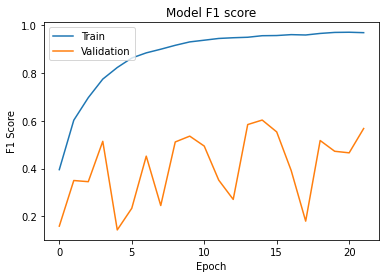

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for auc
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(history.history['Recall'])
plt.plot(history.history['val_Recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for specificity
plt.plot(history.history['specificity'])
plt.plot(history.history['val_specificity'])
plt.title('Model specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['Precision'])
plt.plot(history.history['val_Precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for f1_score
plt.plot(history.history['F1-Score'])
plt.plot(history.history['val_F1-Score'])
plt.title('Model F1 score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Resultados EfficientNet B0
**Batch size alterado p/ 32!**

#### 1º teste

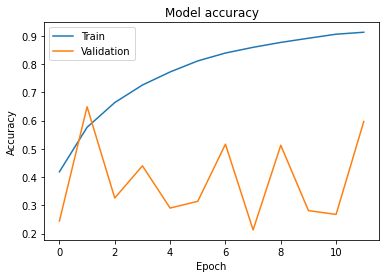

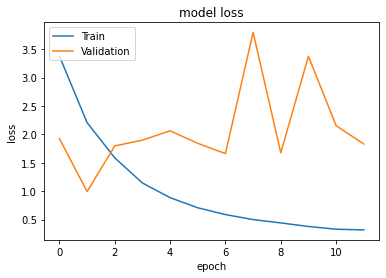

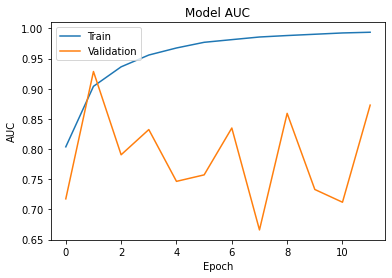

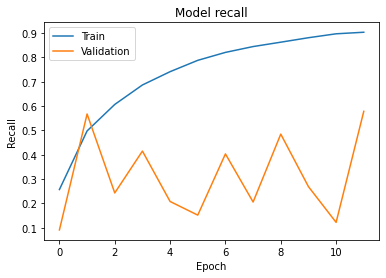

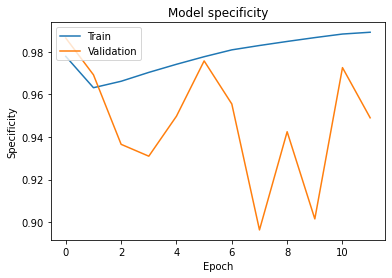

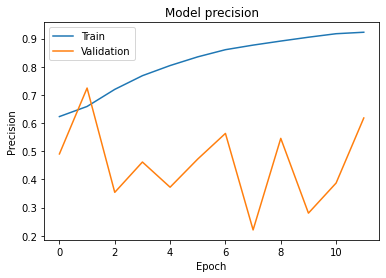

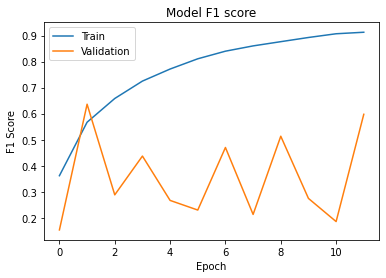

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for auc
plt.plot(history.history['AUC'])
plt.plot(history.history['val_AUC'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for recall
plt.plot(history.history['Recall'])
plt.plot(history.history['val_Recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for specificity
plt.plot(history.history['specificity'])
plt.plot(history.history['val_specificity'])
plt.title('Model specificity')
plt.ylabel('Specificity')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for precision
plt.plot(history.history['Precision'])
plt.plot(history.history['val_Precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# summarize history for f1_score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()